In [38]:
import pandas as pd 

final = pd.read_csv('C:\\Users\\mecheste\\Documents\\GitHub\\SchneiderHackathon_UBEcoFriends\\data\\final_data.csv')
df = final 
df

,Date,Hour,DEgen,DEload,DKgen,DKload,HUgen,HUload,ITgen,ITload,...,DE_surplus,DK_surplus,SE_surplus,NE_surplus,label,spring,summer,winter,day_of_week,is_weekend
0,2022-01-01,0,157373.0,165125.0,3605.0,3218.0,1376.0,16457.0,5745.0,19756.0,...,-7752.0,387.0,-4224.0,-27938.0,5,0,0,1,5,1
1,2022-01-01,1,151747.0,160415.0,3309.0,3126.0,1526.0,15426.0,6228.0,18685.0,...,-8668.0,183.0,-4234.0,-28334.0,5,0,0,1,5,1
2,2022-01-01,2,147938.0,158035.0,3043.0,3080.0,1560.0,14781.0,6407.0,18124.0,...,-10097.0,-37.0,-4641.0,-27599.0,5,0,0,1,5,1
3,2022-01-01,3,141816.0,157016.0,2852.0,3044.0,1287.0,14630.0,5760.0,18400.0,...,-15200.0,-192.0,-4617.0,-26921.0,5,0,0,1,5,1
4,2022-01-01,4,131970.0,154552.0,2724.0,3130.0,1309.0,14688.0,5501.0,19223.0,...,-22582.0,-406.0,-4885.0,-27053.0,5,0,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31,19,175631.0,184106.0,1765.0,3713.0,851.0,17488.0,4198.0,24809.0,...,-8475.0,-1948.0,-4261.0,-28405.0,5,0,0,1,5,1
8756,2022-12-31,20,176499.0,175401.0,1593.0,3579.0,888.0,17075.0,3676.0,23169.0,...,1098.0,-1986.0,-4615.0,-26192.0,4,0,0,1,5,1
8757,2022-12-31,21,175678.0,168830.0,1788.0,3520.0,807.0,16717.0,3641.0,21857.0,...,6848.0,-1732.0,-4565.0,-24637.0,4,0,0,1,5,1
8758,2022-12-31,22,165104.0,161541.0,2242.0,3440.0,754.0,16261.0,3422.0,20555.0,...,3563.0,-1198.0,-4966.0,-24476.0,4,0,0,1,5,1


Mean Values:
HU_surplus    -17522.932991
IT_surplus    -22920.696689
PO_surplus    -15970.168037
SP_surplus    -36521.737100
DE_surplus   -102213.505479
DK_surplus     -1043.190068
SE_surplus     -3292.695627
NE_surplus    -38758.782078
dtype: float64

Variance Values:
HU_surplus    1.325935e+07
IT_surplus    3.656194e+07
PO_surplus    1.131382e+07
SP_surplus    6.334135e+08
DE_surplus    2.598934e+09
DK_surplus    1.843957e+06
SE_surplus    4.087455e+06
NE_surplus    7.339288e+07
dtype: float64


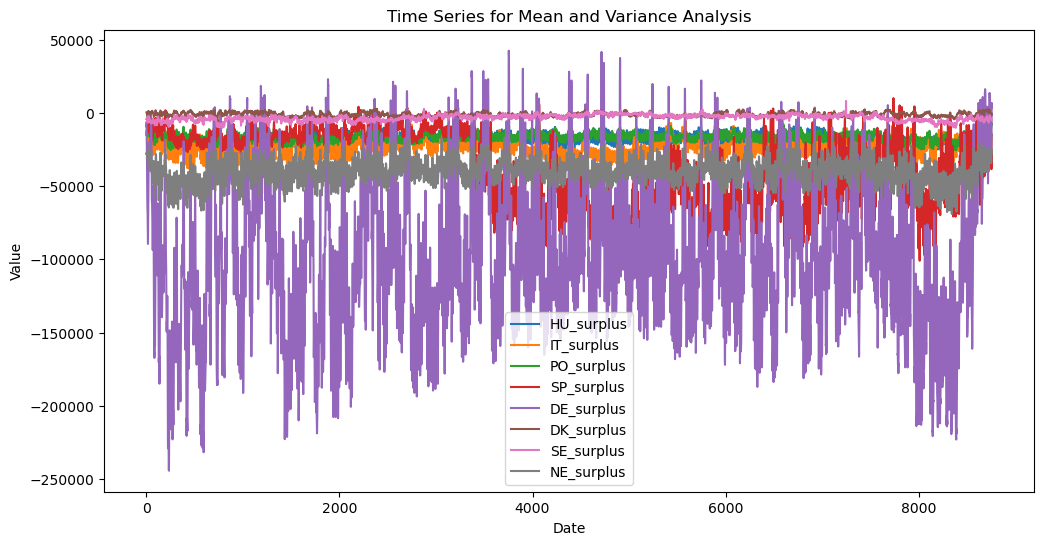

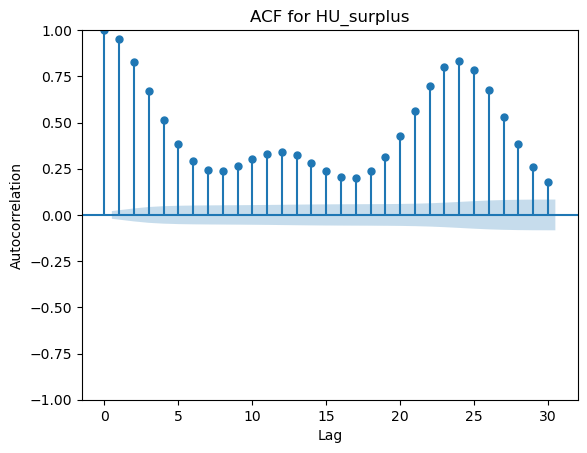

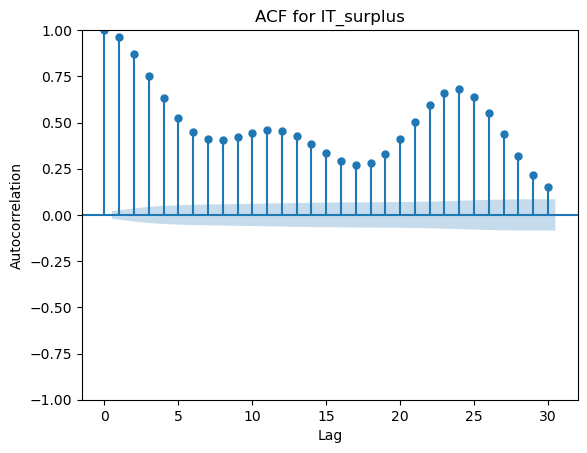

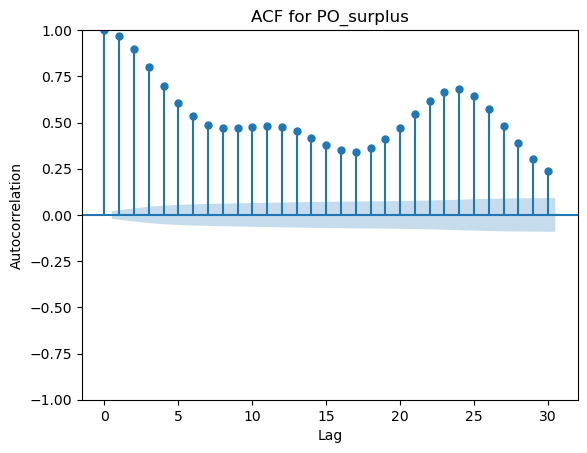

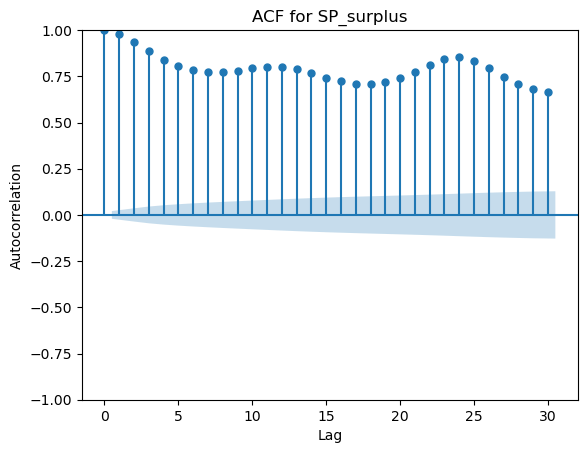

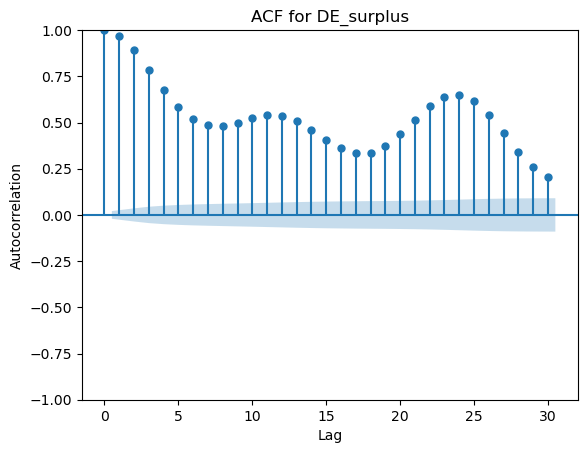

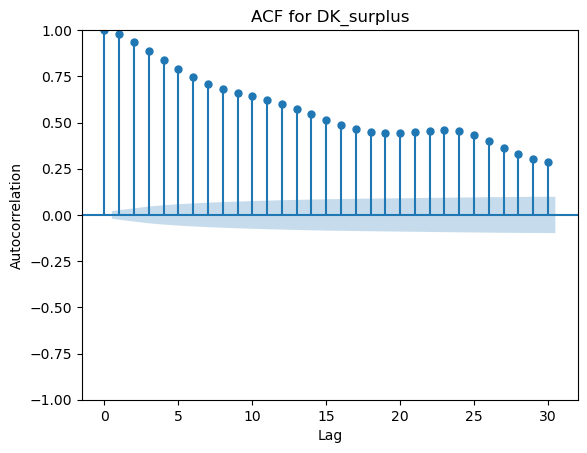

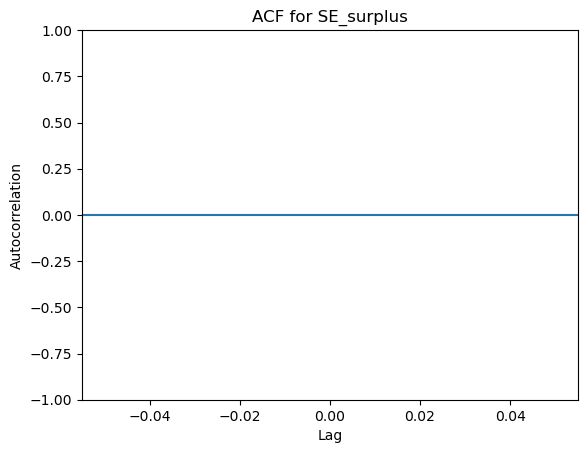

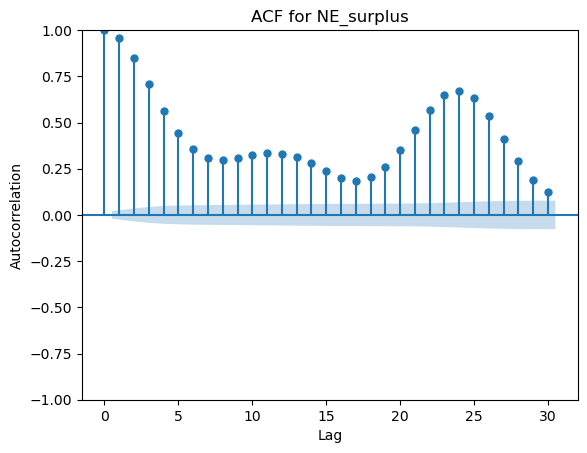

In [39]:
# CHECKING DATA IS STATIONARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your time series data is stored in the 'df' DataFrame

# Extract relevant columns for mean and variance analysis
columns_of_interest = ['HU_surplus', 'IT_surplus', 'PO_surplus', 'SP_surplus', 'DE_surplus', 'DK_surplus', 'SE_surplus', 'NE_surplus']

# Convert the selected columns to numeric
df[columns_of_interest] = df[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Check for Constant Mean
mean_values = df[columns_of_interest].mean()
print("Mean Values:")
print(mean_values)

# Check for Constant Variance
variance_values = df[columns_of_interest].var()
print("\nVariance Values:")
print(variance_values)

# Plot the time series to visually inspect for trends or seasonality
plt.figure(figsize=(12, 6))
for column in columns_of_interest:
    plt.plot(df.index, df[column], label=column)

plt.title('Time Series for Mean and Variance Analysis')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Plot the ACF (Autocorrelation Function) to assess autocorrelation
from statsmodels.graphics.tsaplots import plot_acf
for column in columns_of_interest:
    plot_acf(df[column], lags=30, title=f'ACF for {column}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df and you have already ensured it is fit for ARIMA modeling

df['Date'] = pd.to_datetime(df['Date'])
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)
# Sort the DataFrame by the date
df.sort_index(inplace=True)

# Include all other columns from the original data
additional_columns = [col for col in df.columns if col not in columns_of_interest + ['Date', 'label']]

# Combine the columns of interest and additional columns
all_columns = columns_of_interest + additional_columns

# Assuming you want to predict the country with the greatest surplus for the next hour
# Shift the 'label' column to represent the target variable for the next hour
df['target'] = df['label'].shift(-1)
# Drop rows with NaN values resulting from the shift
df.dropna(inplace=True)

# Define your features (X) and target variable (y)
features = df[all_columns]
target = df['target']

# Perform an initial train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now you have:
# X_train, y_train: Training set (used to train the ARIMA model)
# X_val, y_val: Validation set (used to evaluate the ARIMA model during training)
# X_test, y_test: Test set (used to evaluate the final ARIMA model)

# Print the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (5604, 30), y_train shape: (5604,)
X_val shape: (1402, 30), y_val shape: (1402,)
X_test shape: (1752, 30), y_test shape: (1752,)


In [41]:
# ARIMA

import warnings 
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming X_train and y_train are your training sets, and X_val is your validation set

# Function to fit ARIMA model, make predictions, and calculate accuracy
def fit_arima_predict_evaluate(order, X_train, y_train, X_val, y_val):
    # Fit ARIMA model
    model = ARIMA(y_train, order=order)
    model_fit = model.fit()

    # Make predictions on the validation set
    predictions = model_fit.predict(start=len(X_train), end=len(X_train) + len(X_val) - 1, typ='levels')

    # Evaluate accuracy (using Mean Squared Error as an example)
    mse = mean_squared_error(y_val, predictions)
    print(f'Mean Squared Error (MSE): {mse}')

    return predictions

# Example: Order (p, d, q) for ARIMA model
order = (4,1,5)  # Adjust as needed based on your data

# Fit ARIMA model, make predictions, and calculate accuracy
predictions = fit_arima_predict_evaluate(order, X_train, y_train, X_val, y_val)

# Now, 'predictions' contains the predicted values for the validation set


Mean Squared Error (MSE): 0.20225253472772778


In [ ]:
# FOR FINDING THE BEST ORDER - ARIMA 

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming X_train and y_train are your training sets, and X_val is your validation set

# Function to fit ARIMA model, make predictions, and calculate accuracy
def fit_arima_predict_evaluate(order, X_train, y_train, X_val, y_val):
    # Fit ARIMA model
    model = ARIMA(y_train, order=order)
    model_fit = model.fit()

    # Make predictions on the validation set
    predictions = model_fit.predict(start=len(X_train), end=len(X_train) + len(X_val) - 1, typ='levels')

    # Evaluate accuracy (using Mean Squared Error as an example)
    mse = mean_squared_error(y_val, predictions)
    #print(f'Order {order} - Mean Squared Error (MSE): {mse}')

    return mse, predictions

# Define a range of orders to try
p_values = range(0, 6)  # Example range for p (autoregressive order)
d_values = range(0, 2)  # Example range for d (differencing order)
q_values = range(0, 6)  # Example range for q (moving average order)

# Initialize variables to store best order and corresponding MSE
best_order = None
best_mse = float('inf')

# Loop through different orders
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)

            # Fit ARIMA model, make predictions, and calculate MSE
            mse, _ = fit_arima_predict_evaluate(order, X_train, y_train, X_val, y_val)

            # Update best order if current MSE is lower
            if mse < best_mse:
                best_mse = mse
                best_order = order

# Print the best order
print(f"\nBest Order: {best_order} with MSE: {best_mse}")

# Fit the ARIMA model with the best order on the entire training set
best_order_model = ARIMA(y_train, order=best_order)
best_order_model_fit = best_order_model.fit()

# Make predictions on the test set
test_predictions = best_order_model_fit.predict(start=len(X_train) + len(X_val), end=len(X_train) + len(X_val) + len(X_test) - 1, typ='levels')

# Evaluate accuracy on the test set
test_mse = mean_squared_error(y_test, test_predictions)
print(f'\nTest Set Mean Squared Error (MSE): {test_mse}')

In [42]:
# SARIMA 

import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Suppress SARIMAX warnings
warnings.filterwarnings('ignore')

# Function to fit SARIMA model, make predictions, and calculate accuracy
def fit_sarima_predict_evaluate(order, seasonal_order, X_train, y_train, X_val, y_val):
    # Fit SARIMA model
    model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()

    # Make predictions on the validation set
    predictions = model_fit.predict(start=len(X_train), end=len(X_train) + len(X_val) - 1, typ='levels')

    # Evaluate accuracy (using Mean Squared Error as an example)
    mse = mean_squared_error(y_val, predictions)
    print(f'Mean Squared Error (MSE): {mse}')

    return predictions

# Example: Order (p, d, q) and Seasonal Order (P, D, Q, s) for SARIMA model
order = (2, 0, 2)  # Non-seasonal order
seasonal_order = (1, 0, 0, 12)  # Seasonal order with a seasonality of 12 (adjust as needed based on your data)

# Fit SARIMA model, make predictions, and calculate accuracy
sarima_predictions = fit_sarima_predict_evaluate(order, seasonal_order, X_train, y_train, X_val, y_val)

# Now, 'sarima_predictions' contains the predicted values for the validation set, and MSE is printed

Mean Squared Error (MSE): 0.20240400802926167


In [ ]:
# FOR FINDING BEST ORDER - SARIMA 

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to fit SARIMA model, make predictions, and calculate accuracy
def fit_sarima_predict_evaluate(order, seasonal_order, X_train, y_train, X_val, y_val):
    # Fit SARIMA model
    model = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()

    # Make predictions on the validation set
    predictions = model_fit.predict(start=len(X_train), end=len(X_train) + len(X_val) - 1, typ='levels')

    # Evaluate accuracy (using Mean Squared Error as an example)
    mse = mean_squared_error(y_val, predictions)
    #print(f'Order {order} - Seasonal Order {seasonal_order} - Mean Squared Error (MSE): {mse}')

    return mse, predictions

# Define ranges for orders and seasonal orders to try
p_values = range(0, 3)  # Example range for p (autoregressive order)
d_values = range(0, 2)  # Example range for d (differencing order)
q_values = range(0, 3)  # Example range for q (moving average order)
P_values = range(0, 2)  # Example range for P (seasonal autoregressive order)
D_values = range(0, 2)  # Example range for D (seasonal differencing order)
Q_values = range(0, 2)  # Example range for Q (seasonal moving average order)
s_values = [12]  # Example range for s (seasonal period)

# Initialize variables to store best order and corresponding MSE
best_order = None
best_seasonal_order = None
best_mse = float('inf')

# Loop through different orders and seasonal orders
for p in p_values:
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        for s in s_values:
                            order = (p, d, q)
                            seasonal_order = (P, D, Q, s)

                            # Fit SARIMA model, make predictions, and calculate MSE
                            mse, _ = fit_sarima_predict_evaluate(order, seasonal_order, X_train, y_train, X_val, y_val)

                            # Update best order if current MSE is lower
                            if mse < best_mse:
                                best_mse = mse
                                best_order = order
                                best_seasonal_order = seasonal_order

# Print the best order and seasonal order
print(f"\nBest Order: {best_order}, Best Seasonal Order: {best_seasonal_order} with MSE: {best_mse}")

# Fit the SARIMA model with the best order and seasonal order on the entire training set
best_sarima_model = SARIMAX(y_train, order=best_order, seasonal_order=best_seasonal_order)
best_sarima_model_fit = best_sarima_model.fit()

# Make predictions on the test set
test_sarima_predictions = best_sarima_model_fit.predict(start=len(X_train) + len(X_val), end=len(X_train) + len(X_val) + len(X_test) - 1, typ='levels')

# Evaluate accuracy on the test set
test_sarima_mse = mean_squared_error(y_test, test_sarima_predictions)
print(f'\nTest Set Mean Squared Error (MSE): {test_sarima_mse}')

In [43]:
# ARIMA WITH ETS

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_val, y_val are your training and validation sets
# You've already defined all_columns as the relevant features

# Fit an ARIMA model with ETS
order = (0, 0, 0)  # Adjust as needed based on your data
model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=24)
model_fit = model.fit()

# Make predictions on the validation set
val_predictions = model_fit.forecast(len(X_val))

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, val_predictions)
print(f'Validation Set Mean Squared Error: {mse_val}')

Validation Set Mean Squared Error: 0.2024142783748043


In [ ]:
# FOR FINDING BEST ORDER - ARIMA WITH ETS

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are your training, validation, and test sets
# You've already defined all_columns as the relevant features

# Define a range of orders to try
p_values = range(0, 6)  # Example range for p (autoregressive order)
d_values = range(0, 2)  # Example range for d (differencing order)
q_values = range(0, 6)  # Example range for q (moving average order)

# Initialize variables to store best order and corresponding MSE
best_order = None
best_mse = float('inf')

# Loop through different orders
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)

            # Fit ARIMA model with ETS
            model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=24)
            model_fit = model.fit()

            # Make predictions on the validation set
            val_predictions = model_fit.forecast(len(X_val))

            # Evaluate accuracy (using Mean Squared Error as an example)
            mse = mean_squared_error(y_val, val_predictions)

            # Update best order if current MSE is lower
            if mse < best_mse:
                best_mse = mse
                best_order = order

# Print the best order
print(f"\nBest Order: {best_order} with MSE: {best_mse}")

# Fit the ARIMA model with the best order on the entire training set
best_order_model = ExponentialSmoothing(y_train, trend='add', seasonal='add', seasonal_periods=24)
best_order_model_fit = best_order_model.fit()

# Make predictions on the test set
test_predictions = best_order_model_fit.forecast(len(X_test))

# Evaluate accuracy on the test set
test_mse = mean_squared_error(y_test, test_predictions)
print(f'\nTest Set Mean Squared Error (MSE): {test_mse}')

In [57]:
df2 = final

In [59]:
# XGBOOST 

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# List of surplus columns
surplus_columns = ['HU_surplus', 'IT_surplus', 'PO_surplus', 'SP_surplus', 'DE_surplus', 'DK_surplus', 'SE_surplus', 'NE_surplus']

# Exclude unnecessary columns (assuming 'label' is not needed)
all_columns = ['DEgen', 'DEload', 'DKgen', 'DKload', 'HUgen', 'HUload', 'ITgen', 'ITload', 'NEgen', 'Hour', 'spring', 'summer', 'winter', 'day_of_week', 'is_weekend']

# Dictionary to store XGBoost models
models = {}

# Loop through surplus columns
for surplus_column in surplus_columns:
    # Shift the target variable
    df2['target'] = df2[surplus_column].shift(-1)
    df2.dropna(inplace=True)
    
    # Define your features (X) and target variable (y)
    features = df2[all_columns]
    target = df2['target']
    
    # Perform train-test split (80% train, 20% validation)
    X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)
    
    # Define the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    
    # Hyperparameter tuning using GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    
    # Make predictions on the validation set
    y_val_pred = best_model.predict(X_val)
    
    # Evaluate accuracy (using Mean Squared Error as an example)
    mse = mean_squared_error(y_val, y_val_pred)
    print(f"Mean Squared Error for {surplus_column}: {mse}")
    
    # Save the best model
    models[surplus_column] = best_model


Mean Squared Error for HU_surplus: 189944.18815011068
Mean Squared Error for IT_surplus: 571648.787835823
Mean Squared Error for PO_surplus: 1236910.0852045696
Mean Squared Error for SP_surplus: 80448516.77051407
Mean Squared Error for DE_surplus: 47583300.47724878
Mean Squared Error for DK_surplus: 53202.73936443534
Mean Squared Error for SE_surplus: 731396.3531302682
Mean Squared Error for NE_surplus: 5993754.167127923


Classification Report for HU_surplus:

              precision    recall  f1-score   support

    -66709.0       0.00      0.00      0.00       1.0
    -63415.0       0.00      0.00      0.00       1.0
    -63057.0       0.00      0.00      0.00       1.0
    -63050.0       0.00      0.00      0.00       1.0
    -62938.0       0.00      0.00      0.00       1.0
    -62881.0       0.00      0.00      0.00       1.0
    -62217.0       0.00      0.00      0.00       1.0
    -62059.0       0.00      0.00      0.00       1.0
    -61985.0       0.00      0.00      0.00       1.0
    -61916.0       0.00      0.00      0.00       1.0
    -61577.0       0.00      0.00      0.00       1.0
    -61440.0       0.00      0.00      0.00       1.0
    -61073.0       0.00      0.00      0.00       1.0
    -60852.0       0.00      0.00      0.00       1.0
    -60545.0       0.00      0.00      0.00       1.0
    -60369.0       0.00      0.00      0.00       1.0
    -59736.0       0.00      0.00      0.0

<Figure size 1000x600 with 0 Axes>

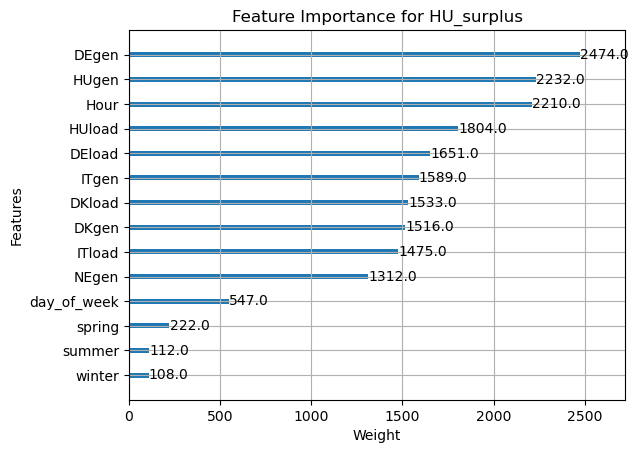

Classification Report for IT_surplus:

              precision    recall  f1-score   support

    -66709.0       0.00      0.00      0.00       1.0
    -63415.0       0.00      0.00      0.00       1.0
    -63057.0       0.00      0.00      0.00       1.0
    -63050.0       0.00      0.00      0.00       1.0
    -62938.0       0.00      0.00      0.00       1.0
    -62881.0       0.00      0.00      0.00       1.0
    -62217.0       0.00      0.00      0.00       1.0
    -62059.0       0.00      0.00      0.00       1.0
    -61985.0       0.00      0.00      0.00       1.0
    -61916.0       0.00      0.00      0.00       1.0
    -61577.0       0.00      0.00      0.00       1.0
    -61440.0       0.00      0.00      0.00       1.0
    -61073.0       0.00      0.00      0.00       1.0
    -60852.0       0.00      0.00      0.00       1.0
    -60545.0       0.00      0.00      0.00       1.0
    -60369.0       0.00      0.00      0.00       1.0
    -59736.0       0.00      0.00      0.0

<Figure size 1000x600 with 0 Axes>

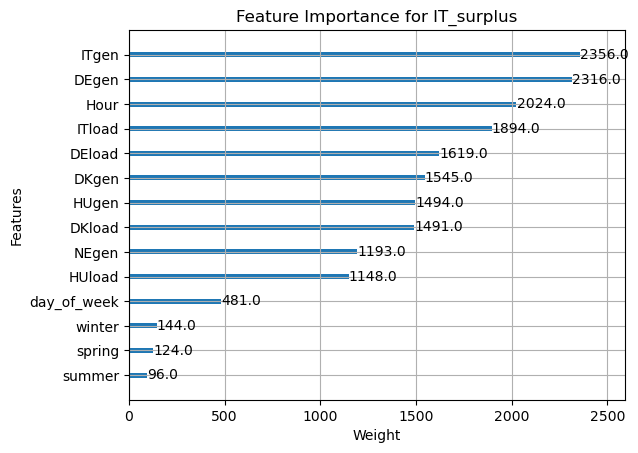

Classification Report for PO_surplus:

              precision    recall  f1-score   support

    -66709.0       0.00      0.00      0.00       1.0
    -63415.0       0.00      0.00      0.00       1.0
    -63057.0       0.00      0.00      0.00       1.0
    -63050.0       0.00      0.00      0.00       1.0
    -62938.0       0.00      0.00      0.00       1.0
    -62881.0       0.00      0.00      0.00       1.0
    -62217.0       0.00      0.00      0.00       1.0
    -62059.0       0.00      0.00      0.00       1.0
    -61985.0       0.00      0.00      0.00       1.0
    -61916.0       0.00      0.00      0.00       1.0
    -61577.0       0.00      0.00      0.00       1.0
    -61440.0       0.00      0.00      0.00       1.0
    -61073.0       0.00      0.00      0.00       1.0
    -60852.0       0.00      0.00      0.00       1.0
    -60545.0       0.00      0.00      0.00       1.0
    -60369.0       0.00      0.00      0.00       1.0
    -59736.0       0.00      0.00      0.0

<Figure size 1000x600 with 0 Axes>

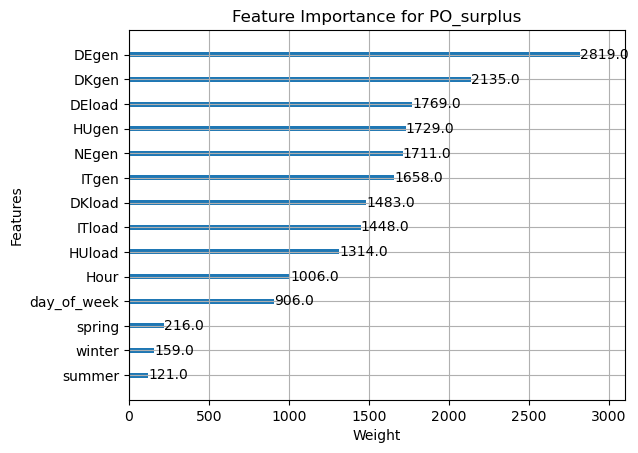

Classification Report for SP_surplus:

              precision    recall  f1-score   support

    -66709.0       0.00      0.00      0.00       1.0
    -63415.0       0.00      0.00      0.00       1.0
    -63057.0       0.00      0.00      0.00       1.0
    -63050.0       0.00      0.00      0.00       1.0
    -62938.0       0.00      0.00      0.00       1.0
    -62881.0       0.00      0.00      0.00       1.0
    -62217.0       0.00      0.00      0.00       1.0
    -62059.0       0.00      0.00      0.00       1.0
    -61985.0       0.00      0.00      0.00       1.0
    -61916.0       0.00      0.00      0.00       1.0
    -61577.0       0.00      0.00      0.00       1.0
    -61440.0       0.00      0.00      0.00       1.0
    -61073.0       0.00      0.00      0.00       1.0
    -60852.0       0.00      0.00      0.00       1.0
    -60545.0       0.00      0.00      0.00       1.0
    -60369.0       0.00      0.00      0.00       1.0
    -59736.0       0.00      0.00      0.0

<Figure size 1000x600 with 0 Axes>

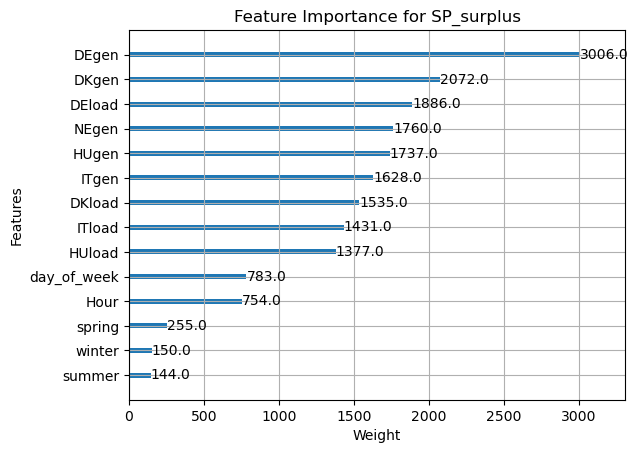

Classification Report for DE_surplus:

              precision    recall  f1-score   support

    -66709.0       0.00      0.00      0.00       1.0
    -63415.0       0.00      0.00      0.00       1.0
    -63057.0       0.00      0.00      0.00       1.0
    -63050.0       0.00      0.00      0.00       1.0
    -62938.0       0.00      0.00      0.00       1.0
    -62881.0       0.00      0.00      0.00       1.0
    -62217.0       0.00      0.00      0.00       1.0
    -62059.0       0.00      0.00      0.00       1.0
    -61985.0       0.00      0.00      0.00       1.0
    -61916.0       0.00      0.00      0.00       1.0
    -61577.0       0.00      0.00      0.00       1.0
    -61440.0       0.00      0.00      0.00       1.0
    -61073.0       0.00      0.00      0.00       1.0
    -60852.0       0.00      0.00      0.00       1.0
    -60545.0       0.00      0.00      0.00       1.0
    -60369.0       0.00      0.00      0.00       1.0
    -59736.0       0.00      0.00      0.0

<Figure size 1000x600 with 0 Axes>

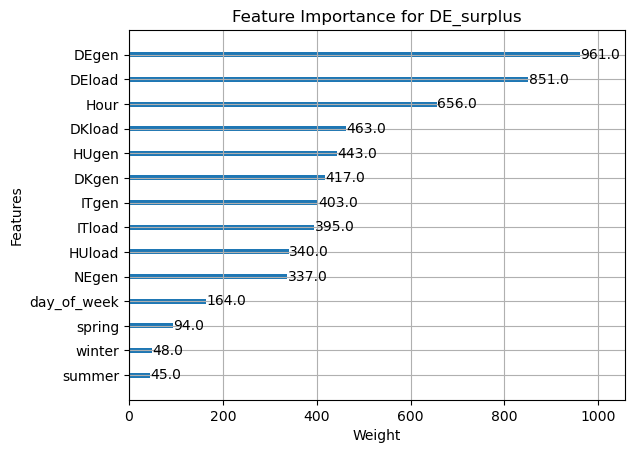

Classification Report for DK_surplus:

              precision    recall  f1-score   support

    -66709.0       0.00      0.00      0.00       1.0
    -63415.0       0.00      0.00      0.00       1.0
    -63057.0       0.00      0.00      0.00       1.0
    -63050.0       0.00      0.00      0.00       1.0
    -62938.0       0.00      0.00      0.00       1.0
    -62881.0       0.00      0.00      0.00       1.0
    -62217.0       0.00      0.00      0.00       1.0
    -62059.0       0.00      0.00      0.00       1.0
    -61985.0       0.00      0.00      0.00       1.0
    -61916.0       0.00      0.00      0.00       1.0
    -61577.0       0.00      0.00      0.00       1.0
    -61440.0       0.00      0.00      0.00       1.0
    -61073.0       0.00      0.00      0.00       1.0
    -60852.0       0.00      0.00      0.00       1.0
    -60545.0       0.00      0.00      0.00       1.0
    -60369.0       0.00      0.00      0.00       1.0
    -59736.0       0.00      0.00      0.0

<Figure size 1000x600 with 0 Axes>

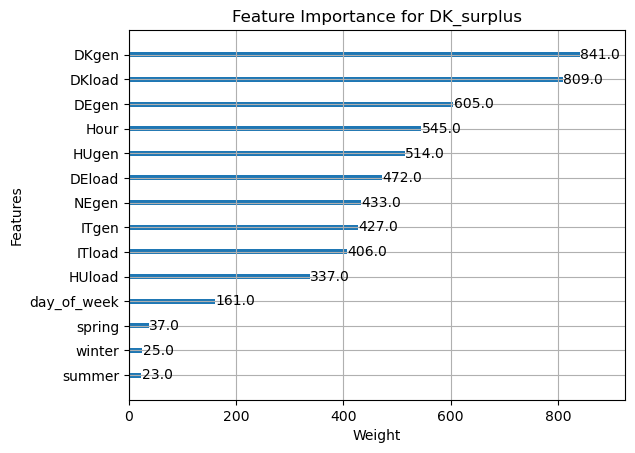

Classification Report for SE_surplus:

              precision    recall  f1-score   support

    -66709.0       0.00      0.00      0.00       1.0
    -63415.0       0.00      0.00      0.00       1.0
    -63057.0       0.00      0.00      0.00       1.0
    -63050.0       0.00      0.00      0.00       1.0
    -62938.0       0.00      0.00      0.00       1.0
    -62881.0       0.00      0.00      0.00       1.0
    -62217.0       0.00      0.00      0.00       1.0
    -62059.0       0.00      0.00      0.00       1.0
    -61985.0       0.00      0.00      0.00       1.0
    -61916.0       0.00      0.00      0.00       1.0
    -61577.0       0.00      0.00      0.00       1.0
    -61440.0       0.00      0.00      0.00       1.0
    -61073.0       0.00      0.00      0.00       1.0
    -60852.0       0.00      0.00      0.00       1.0
    -60545.0       0.00      0.00      0.00       1.0
    -60369.0       0.00      0.00      0.00       1.0
    -59736.0       0.00      0.00      0.0

<Figure size 1000x600 with 0 Axes>

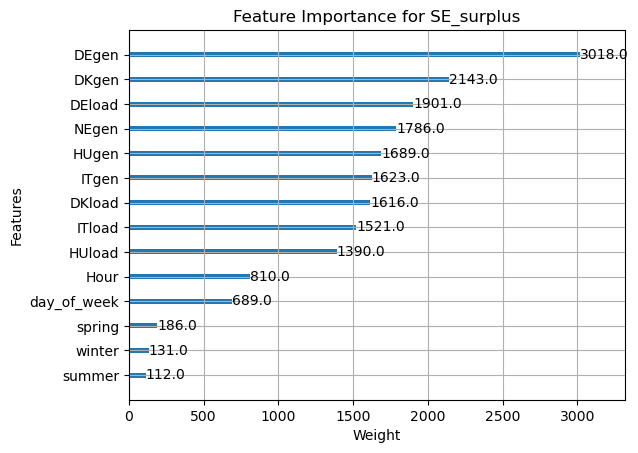

Classification Report for NE_surplus:

              precision    recall  f1-score   support

    -66709.0       0.00      0.00      0.00       1.0
    -63415.0       0.00      0.00      0.00       1.0
    -63057.0       0.00      0.00      0.00       1.0
    -63050.0       0.00      0.00      0.00       1.0
    -62938.0       0.00      0.00      0.00       1.0
    -62881.0       0.00      0.00      0.00       1.0
    -62217.0       0.00      0.00      0.00       1.0
    -62059.0       0.00      0.00      0.00       1.0
    -61985.0       0.00      0.00      0.00       1.0
    -61916.0       0.00      0.00      0.00       1.0
    -61577.0       0.00      0.00      0.00       1.0
    -61440.0       0.00      0.00      0.00       1.0
    -61073.0       0.00      0.00      0.00       1.0
    -60852.0       0.00      0.00      0.00       1.0
    -60545.0       0.00      0.00      0.00       1.0
    -60369.0       0.00      0.00      0.00       1.0
    -59736.0       0.00      0.00      0.0

<Figure size 1000x600 with 0 Axes>

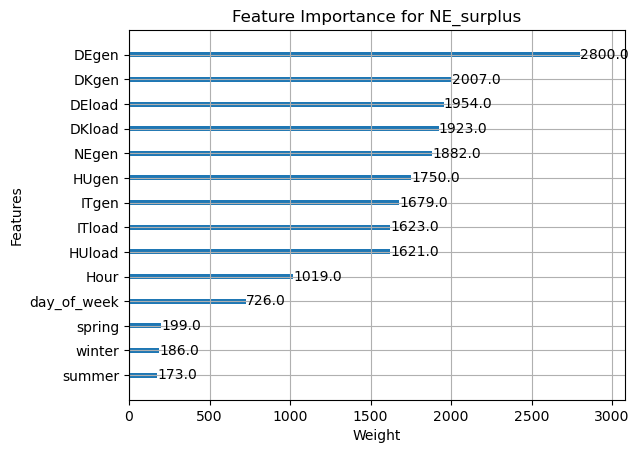

In [60]:
# XGBOOST METRICS 

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'models' is the dictionary containing your XGBoost models

for surplus_column, model in models.items():
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)
    
    # Convert predicted values to binary classes (you can adjust this based on your problem)
    y_val_pred_binary = (y_val_pred > 0.5).astype(int)
    
    # Print classification report
    print(f"Classification Report for {surplus_column}:\n")
    print(classification_report(y_val, y_val_pred_binary))
    
    # Print confusion matrix
    cm = confusion_matrix(y_val, y_val_pred_binary)
    print(f"Confusion Matrix for {surplus_column}:\n")
    print(cm)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    xgb.plot_importance(model, importance_type='weight', xlabel='Weight', ylabel='Features', title=f'Feature Importance for {surplus_column}')
    plt.show()

In [ ]:
# PROPHET

!pip install pystan==2.19.1.1
!pip install fbprophet
from fbprophet import Prophet
import pandas as pd

# Assuming 'Date' is the timestamp column and 'label' is the target variable
prophet_df = df[['Date', 'label']].rename(columns={'Date': 'ds', 'label': 'y'})

# Split the data into training and validation sets
train_size = int(len(prophet_df) * 0.8)
train, val = prophet_df[:train_size], prophet_df[train_size:]

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(train)

# Make predictions on the validation set
future = prophet_model.make_future_dataframe(periods=len(val))
prophet_predictions = prophet_model.predict(future)

# Extract the relevant columns for validation set
prophet_val_predictions = prophet_predictions[-len(val):][['ds', 'yhat']]

# Plot the actual vs. predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(val['ds'], val['y'], label='Actual', color='blue')
plt.plot(prophet_val_predictions['ds'], prophet_val_predictions['yhat'], label='Prophet Predicted', color='orange')
plt.title('Actual vs. Prophet Predicted Values')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

In [ ]:
# NEURAL PROPHET 

from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' is the timestamp column and 'label' is the target variable
neural_prophet_df = df[['Date', 'label']].rename(columns={'Date': 'ds', 'label': 'y'})

# Split the data into training and validation sets
train_size = int(len(neural_prophet_df) * 0.8)
train, val = neural_prophet_df[:train_size], neural_prophet_df[train_size:]

# Initialize and fit the NeuralProphet model with custom hyperparameters
neural_prophet_model = NeuralProphet(
    n_changepoints=30,
    num_hidden_layers=2,
    d_hidden=[32, 16],  # Two hidden layers with 32 and 16 neurons, respectively
    learning_rate=0.005,
    lambda_reg=0.1,
    dropout_rate=0.1,
    batch_size=128,
    epochs=50,
    n_lags=12
)
neural_prophet_model.fit(train, freq='H')  # Assuming hourly frequency, adjust as needed

# Make predictions on the validation set
future = neural_prophet_model.make_future_dataframe(val, periods=len(val))
neural_prophet_predictions = neural_prophet_model.predict(future)

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(val['ds'], val['y'], label='Actual', color='blue')
plt.plot(neural_prophet_predictions['ds'], neural_prophet_predictions['yhat1'], label='NeuralProphet Predicted', color='purple')
plt.title('Actual vs. NeuralProphet Predicted Values')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.legend()
plt.show()